In [1]:
import pandas as pd
import numpy as np

# Временные ряды

## Где используются?

- Предсказание цен и объемов продаж на биржах
- Предсказание финансовых и экономических показателей
- Предсказание погоды
- Предсказание экономических показателей
- Анализ медико-биологических приборов

## Основные компоненты временного ряда

Временной ряд - набор значений $Y_t$, причем интервал $Δt=const$

Тренд ($Т$) - компонента ряда, показывающая влияние долговременных факторов

Цикличность ($С$) - компонента ряда, описывающая длительные периоды спада и подъема, состоит из циклов, меняющихся по амплитуде и протяженности

Сезонность ($S$) - компонента ряда, состоит из повторяющихся циклов

## Моделирование рядов

$Y = T + C + S + e$ - аддитивная модель

$Y = T * C * S * e$ - мультипликативная модель

От второго можно перейти к первому при помощи логарифмирования.

## Стационарность

Стационарность - важное свойство временных рядов. Стационарные ряды очень просто прогнозировать.

Ряд называется стационарным, если его среднее, ковариация и дисперсия не зависят от времени.

Пример:

![](images/stationary.png)

Нестационарные ряды:

![](images/non-stationary.png)



## Стационарен ли ряд с погодой?

<AxesSubplot:xlabel='Day'>

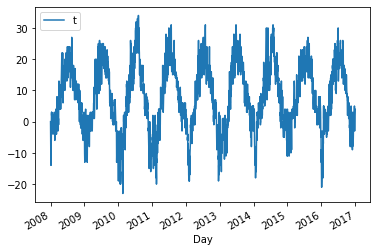

In [2]:
df = pd.read_csv('data/weather.csv', index_col=0, parse_dates=True)
df.plot()

А если посчитать среднее по месяцам?

In [39]:
df['month'] = df.index.month
df['year'] = df.index.year
df_monthly = df.groupby(['year', 'month']).mean()

<AxesSubplot:xlabel='year,month'>

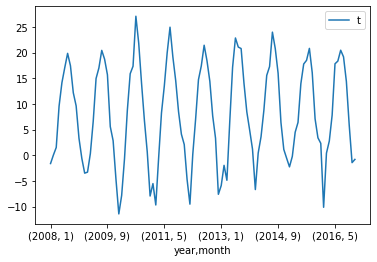

In [40]:
df_monthly.plot()

## Как проверять на стационарность?

- Критерий KPSS (Kwiatkowski–Phillips–Schmidt–Shin)
- DF-тест (Dickey — Fuller test)


In [3]:
import statsmodels.tsa.stattools

У критерия KPSS нулевая гипотеза - ряд стационарен.

In [4]:
stat, p_value, *_ = statsmodels.tsa.stattools.kpss(df)
stat, p_value

C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\stattools.py:2002: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.057906876954034105, 0.1)

p-value больше 0.05, нулевая гипотеза верна, ряд стационарен

У теста Дики-Фуллера нулевая гипотеза - ряд нестационарен.

In [5]:
stat, pvalue, *_ = statsmodels.tsa.stattools.adfuller(df)
stat, pvalue

(-3.741668737176909, 0.0035637921570909913)

Нулевая гипотеза неверна - ряд стационарен

## Задача

Проверить на стационарность двумя критериями последний месяц измерений (по полному датасету)

In [ ]:
# Ваш код здесь


## Модель ARIMA

Модель ARIMA умеет прогнозировать стационарный ряд с любой заданной точностью

Также умеет прогнозировать нестационарные ряды с линейным трендом и нестационарные ряды с сезонностью

У этой модели три параметра - $p$, $d$ и $q$

- $p$ - определяется при помощи графика автокорреляции
- $d$ - количество дифференцирований ряда, определяется подбором
- $q$ - определяется при помощи графика частичной автокорреляции


Качество модели можно измерять при помощи метрики AIC.

Как определить, что прогноз оптимален? Остатки $y_{pred} - y_{real}$ должны быть распределены нормально.

In [60]:
from statsmodels.tsa.arima.model import ARIMA

Попробуем перебрать некоторые параметры и определить "на глаз" + по критерию Акаике какая модель лучше

C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

AIC= 661.438334919222


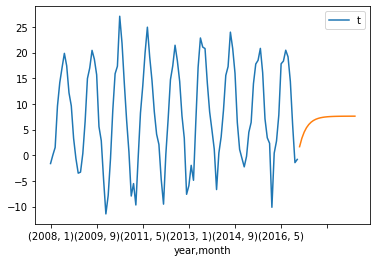

In [88]:
model_fit = ARIMA(df_monthly, order=(1, 0, 1)).fit()
df_monthly.plot()
model_fit.forecast(25).plot()
print('AIC=', model_fit.aic)

## Определяем параметры

In [89]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

<AxesSubplot:xlabel='year,month'>

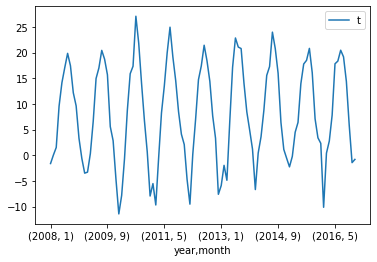

In [90]:
df_monthly.plot()

Все значения ACF вне синей области можно использовать в качестве параметра $p$

C:\Users\koval\AppData\Local\Temp/ipykernel_11796/2711409000.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(df_monthly).show()


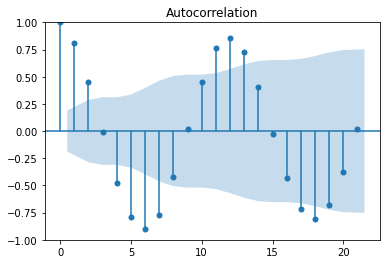

In [91]:
plot_acf(df_monthly).show()

Все значения PACF вне синей области можно использовать в качестве параметра $q$

C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\koval\AppData\Local\Temp/ipykernel_11796/3855964489.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(df_monthly).show()


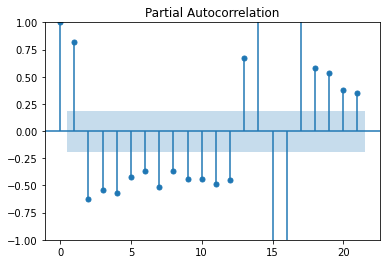

In [94]:
plot_pacf(df_monthly).show()

## Задача

Найти оптимальные p, q и d (использовать критерий Акаике).

Разбить данные на треин и тест, посчитать МSЕ или MAE, вывести график, на котором отобразить разными цветами:
- тренировочную выборку
- тестовую выборку
- прогноз

In [ ]:
# Ваш код здесь


## Что делать, если ряд нестационарный?

Сводить его к стационарному!

Есть несколько способов это сделать:

- логарифмируем ряд (если есть отрицательные значения, то перед этим добавляем ко всему ряду константу) - в случае, когда дисперсия непостоянная
- дифференцируем - в случае, когда среднее непостоянное (есть линейный тренд)

## Задача

К датасету с погодой применить логарифм и спрогнозировать ряд. Сравнить с тем, что было до этого. Не забываем про обратное преобразование.

In [ ]:
# Ваш код здесь


## Задача

К датасету с погодой примернить дифференцирование и спрогнозировать ряд. Сравнить с тем, что было до этого.

Обратное преобразование можно сделать при помощи `np.cumsum()`

In [ ]:
# Ваш код здесь


Чтобы каждый раз не реализовывать перебор параметров модели, написано алгоритм авто-аримы. Он реализован, например, в библиотеке `pmdarima`

## Кросс-валидация для временных рядов

![](images/ts-cross-validation.png)

Можно строить прогноз на 1 шаг вперед и считать метрику между получившимися прогнозами и фактом.

Можно обучать не на всех данных, а на каком-то окне (на последних 10 значениях, например).

## Задача

Реализовать кросс-валидацию для временного ряда, прогнозируя на один шаг вперед. Оценить точность модели.

In [ ]:
# Ваш код здесь


## Многомерные временные ряды

Есть аналог модели AR для многомерных временных рядов - модель VAR

In [95]:
from statsmodels.tsa.api import VAR


## Прогнозирование временных рядов с использованием других моделей

Входными данными $X$ в такой задаче будет вектор от 1 до $n$, где $n$ - размер выборки. Модель попытается обобщить закономерность и выдать результат.

Главная проблема - переобучение.

## Задача

Применить `RandomForestRegressor` к датасету с погодой. Применить кросс-валидацию, сравнить с ARIMA.

# Домашняя работа

Найти данные о заболеваемости/смертности/выздоровлении COVID-19 (они есть например на Kaggle) и использовать их для решения заданий. Можно использовать как данные по какому-то конкретному региону/стране, так и данные по всему миру.

Скорее всего, результат по всем задачам получится не очень.

## Easy

Проверить ряд на стационарность. Привести ряд к стационарному виду.

Построить прогноз заболеваемости, используя модель ARIMA, на месяц вперед. Подобрать оптимальные параметры модели. Визуализировать результат. Выглядит ли такой прогноз реалистичным? 

Для решения задачи можно использовать `pmdarima`

## Normal

Применить градиентный бустинг для решения задачи. Используя кросс-валидацию, сравнить результаты ARIMA и бустинга.

## Hard

Применить библиотеку Prophet, сравнить результаты с предыдущими двумя.

Сравнить результат с бейзлайн-решением (прогноз на завтра - сегодняшнее количество).

Оценить остатки всех трех моделей, проверить гипотезу, что остатки распределены нормально.